In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [23]:
hc = pd.read_csv("Cardiovascular dataset (1).csv",sep =';')

In [24]:
hc

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [25]:
hc.rename(columns = {'age':'age_days'},inplace=True)

In [26]:
hc

,id,age_days,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [27]:
# 1. What is the shape of the dataset?
hc.shape

(70000, 13)

<Axes: >

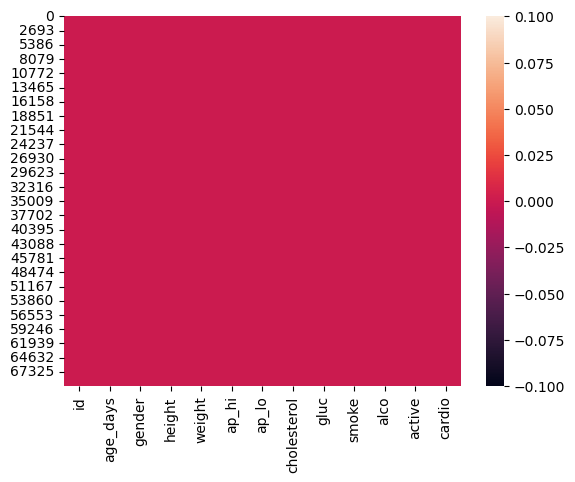

In [28]:
# 2. Are there any missing values in the dataset?
sns.heatmap(hc.isnull())


### no, there are no missing values in the dataset.

gender: [2 1]
cholesteral: [1 3 2]
Glucose: [1 2 3]


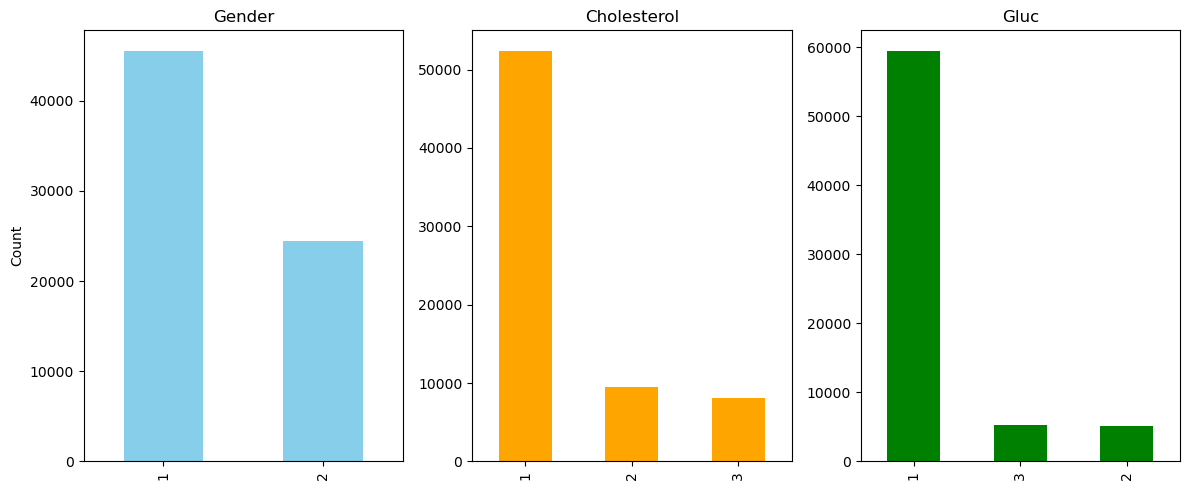

In [29]:
# 3. What are the unique values for categorical features like gender, 
# cholesterol, gluc?

print('gender:',hc['gender'].unique())
print('cholesteral:',hc['cholesterol'].unique())
print('Glucose:',hc['gluc'].unique())



plt.figure(figsize=(12, 5))

# Gender
plt.subplot(1, 3, 1)
hc['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender')
plt.xlabel('')
plt.ylabel('Count')

# Cholesterol
plt.subplot(1, 3, 2)
hc['cholesterol'].value_counts().plot(kind='bar', color='orange')
plt.title('Cholesterol')
plt.xlabel('')

# Gluc
plt.subplot(1, 3, 3)
hc['gluc'].value_counts().plot(kind='bar', color='green')
plt.title('Gluc')
plt.xlabel('')

plt.tight_layout()
plt.show()



Most records are Gender = 1, with Cholesterol = 1 and Glucose = 1 being the most common categories, while other levels occur far less frequently.

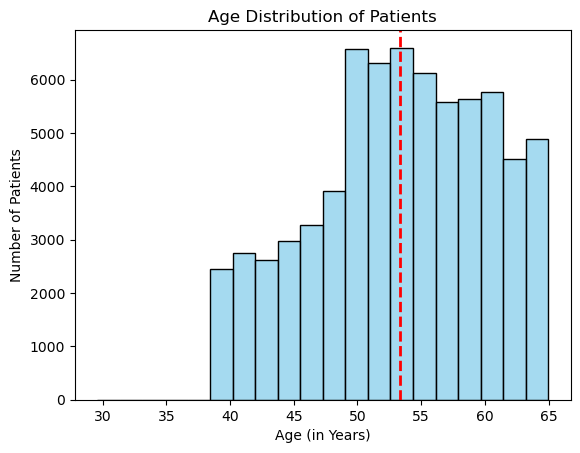

In [30]:
# 4.What’s the average age of patients (in years)? 
hc['age_years'] = hc['age_days']/365
avg_age=hc['age_years'].mean()
sns.histplot(hc['age_years'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.axvline(avg_age, color='red', linestyle='dashed', linewidth=2)
plt.title("Age Distribution of Patients")
plt.xlabel("Age (in Years)")
plt.ylabel("Number of Patients")
plt.show()



#The patients’ ages are mostly concentrated between 45–60 years, with an average age around the early 50s (shown by the red dashed line).

# the average age of patients :-53.33

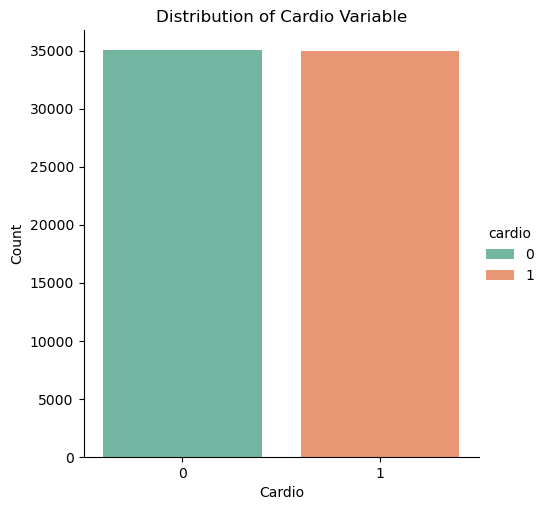

In [31]:
#5. What is the distribution of the target variable (cardio)?
hc['cardio'].value_counts()
sns.catplot(x='cardio', data=hc,hue='cardio',kind='count',palette='Set2')
plt.title('Distribution of Cardio Variable')
plt.xlabel('Cardio')
plt.ylabel('Count')
plt.show()




The dataset is well balanced, with nearly equal numbers of patients with (cardio = 1) and without (cardio = 0) cardiovascular disease.

In [32]:
# 6. What is the average age (in years) of patients?
avg_year = hc['age_years'].mean()

In [33]:
avg_year

53.33935839530333

# the average age (in years) of patients :- 53.33

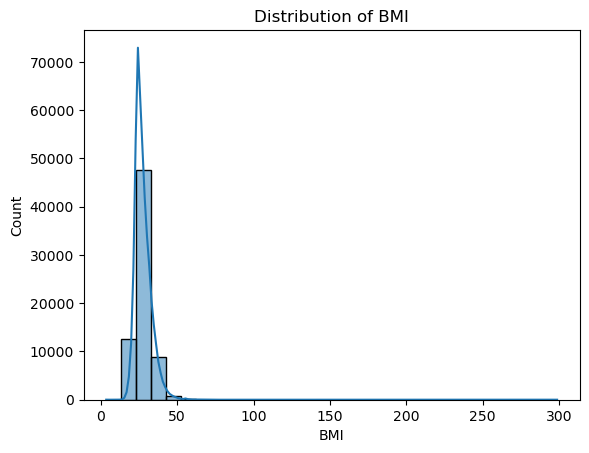

In [34]:
# 7.What is the distribution of BMI? (Create new BMI feature)
hc['bmi'] = hc['weight'] / ((hc['height']/100)**2)
sns.histplot(hc['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


BMI values are right-skewed, with most patients clustered around 20–35, and a few extreme outliers at very high BMI levels.

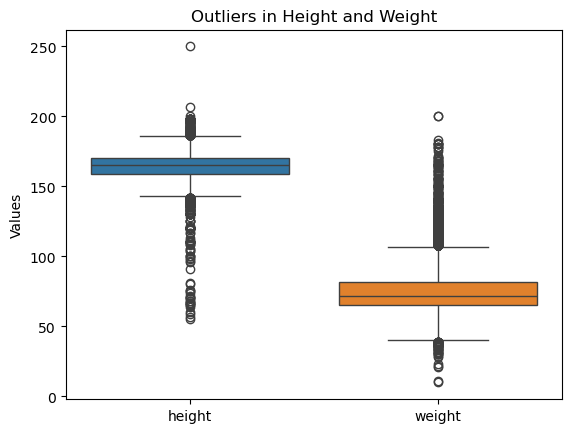

In [35]:
# 8.Are there outliers in height or weight? 
sns.boxplot(data=hc[['height', 'weight']])
plt.title('Outliers in Height and Weight')
plt.ylabel('Values')
plt.show()



# yes,there outliers in height or weight

Text(0, 0.5, 'Systolic BP (ap_hi)')

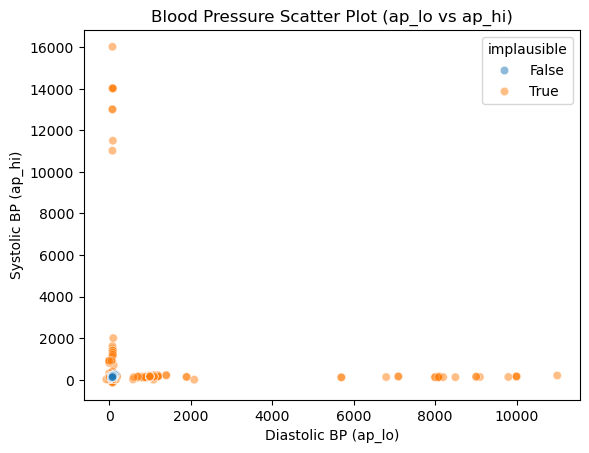

In [36]:
# 9. Are there implausible blood pressure values (e.g., ap_hi < ap_lo or too high)?

hc['implausible'] = ((hc['ap_hi'] < hc['ap_lo']) |
                     (hc['ap_hi'] > 250) | (hc['ap_lo'] > 200) |
                     (hc['ap_hi'] < 70)  | (hc['ap_lo'] < 40))

sns.scatterplot(x='ap_lo', y='ap_hi', hue='implausible', data=hc, alpha=0.5)
plt.title("Blood Pressure Scatter Plot (ap_lo vs ap_hi)")
plt.xlabel("Diastolic BP (ap_lo)")
plt.ylabel("Systolic BP (ap_hi)")




The scatter plot reveals many implausible blood pressure readings (extremely high or inconsistent ap_lo/ap_hi values), indicating data entry errors or outliers that need cleaning

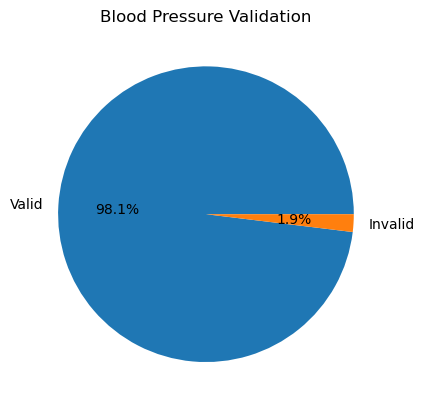

In [118]:
# 10.  How many rows have incorrect blood pressure values?
#Column             Condition                                     Reason
#ap_hi              between 80 and 250                     realistic systolic
#ap_lo              between 50 and 200                     realistic diastolic
#ap_hi >= ap_lo     systolic must be ≥ diastolic           logical

bp_valid = ((hc['ap_hi'].between(80, 250)) &
                  (hc['ap_lo'].between(50, 200)) &
                  (hc['ap_hi'] >= hc['ap_lo']))
plt.pie(bp_valid.value_counts(), labels=['Valid', 'Invalid'], autopct='%1.1f%%')
plt.title('Blood Pressure Validation')
plt.show()



98.1% valid and 1.9% invalid blood pressure

In [17]:
# 11. Remove rows with invalid blood pressure, height, or weight?
#Height between 120cm to 220cm
#Weight between 40 to 200kg
valid_rows = (
    (hc['ap_hi'].between(80, 250)) &
    (hc['ap_lo'].between(50, 200)) &
    (hc['ap_hi'] >= hc['ap_lo']) &
    (hc['height'].between(120, 220)) &
    (hc['weight'].between(40, 200))
)

clean = hc[valid_rows]

print("Original rows:", hc.shape[0])
print("Cleaned rows:", clean.shape[0])
print("Removed rows:", hc.shape[0] - clean.shape[0])



Original rows: 70000
Cleaned rows: 68553
Removed rows: 1447


In [47]:
# 12. What is the distribution of cholesterol and glucose levels after cleaning?
hc

,id,age_days,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,implausible
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,False
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,False
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,26.927438,False
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548,50.472681,False
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616,31.353579,False
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,27.099251,False


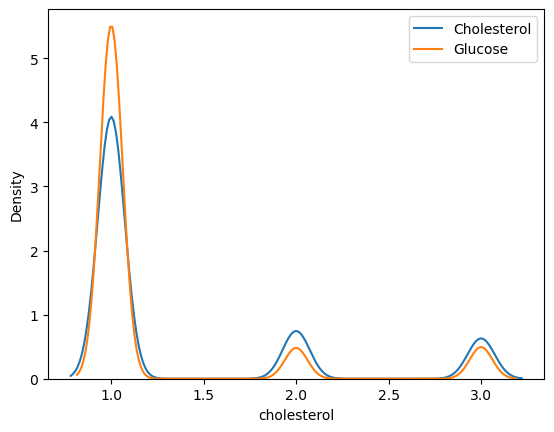

In [61]:

sns.kdeplot(hc['cholesterol'], label='Cholesterol')
sns.kdeplot(hc['gluc'], label='Glucose')
plt.legend()
plt.show()




Both cholesterol and glucose are heavily concentrated at normal level (1), with smaller peaks at elevated (2) and high (3) levels, indicating most patients fall in the normal range.

In [63]:
hc

,id,age_days,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,implausible
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,False
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,False
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,26.927438,False
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548,50.472681,False
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616,31.353579,False
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,27.099251,False


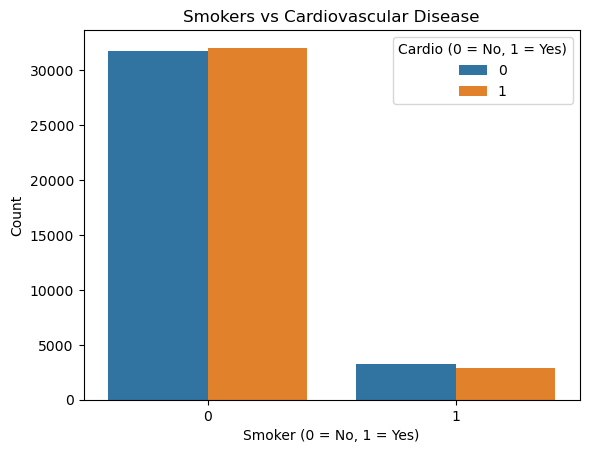

In [68]:
#13. How many smokers have cardiovascular disease? 

sns.countplot(x='smoke', hue='cardio', data=hc)
plt.title("Smokers vs Cardiovascular Disease")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Cardio (0 = No, 1 = Yes)")
plt.show()
     


30,000 smokers have cardiovascular disease

In [70]:
#14. Does alcohol intake correlate with higher cardio risk?


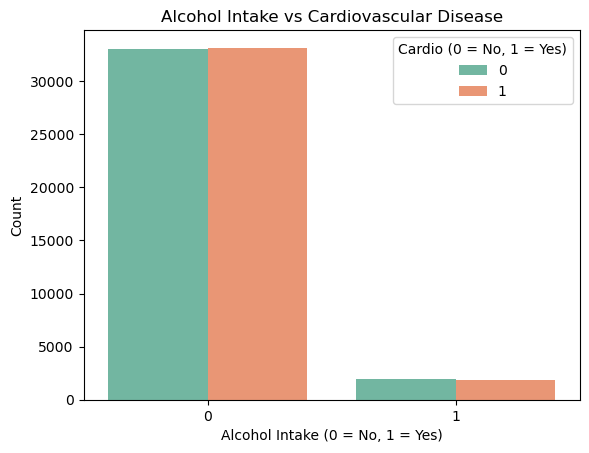

In [76]:
sns.countplot(x='alco', hue='cardio', data=hc, palette='Set2')
plt.title('Alcohol Intake vs Cardiovascular Disease')
plt.xlabel('Alcohol Intake (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Cardio (0 = No, 1 = Yes)')
plt.show()

 # yes, alcohol intake correlate with higher cardio risk

In [71]:
# 15. What’s the correlation between features? 


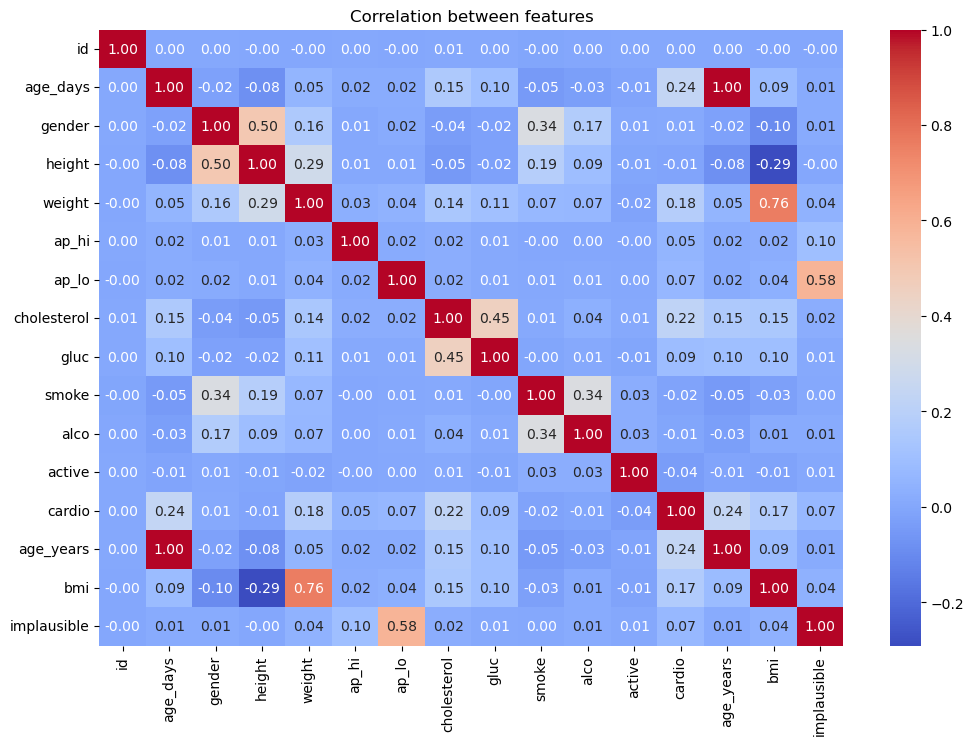

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between features')
plt.show()



In [81]:
# 16. Compare mean BMI for cardio vs. non-cardio
hc

,id,age_days,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,implausible
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,False
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,False
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,26.927438,False
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548,50.472681,False
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616,31.353579,False
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,27.099251,False


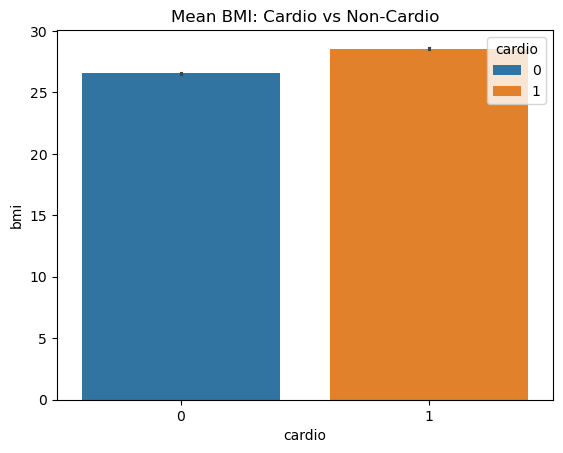

In [85]:
sns.barplot(x='cardio', y='bmi', data=hc,hue='cardio')
plt.title('Mean BMI: Cardio vs Non-Cardio')
plt.show()

mean BMI is heigher in cardio patients

C:\Users\Dell\AppData\Local\Temp\ipykernel_17804\1942916157.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cardio (0 = No, 1 = Yes)")


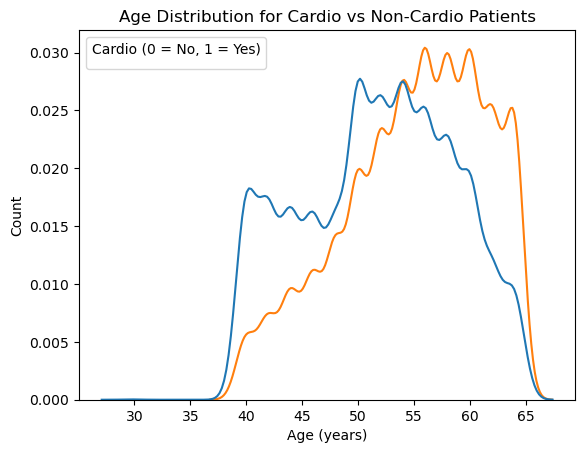

In [92]:
# 17. Plot age distribution for those with and without cardio disease

sns.kdeplot(data=hc, x='age_years', hue='cardio')
plt.title("Age Distribution for Cardio vs Non-Cardio Patients")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.legend(title="Cardio (0 = No, 1 = Yes)")
plt.show()

Basically, non cardio patients live longer compared to cardio patients.

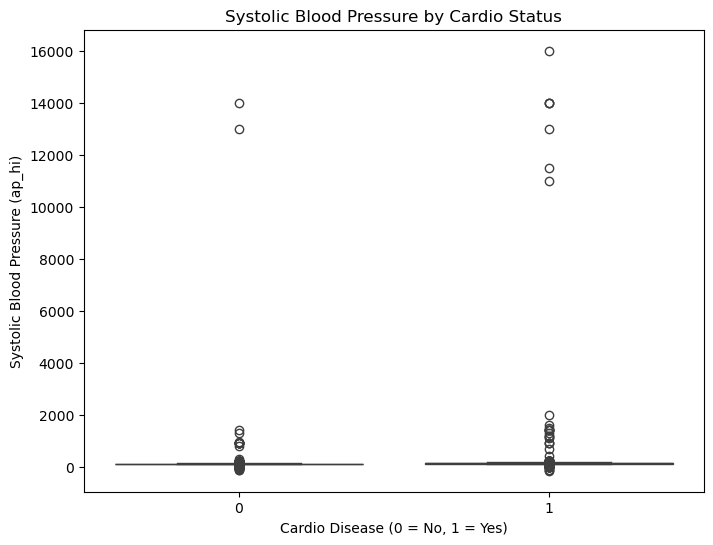

In [94]:
# 18. Boxplot of systolic blood pressure by cardio status 
plt.figure(figsize=(8,6))

sns.boxplot(x='cardio', y='ap_hi', data=hc)
plt.title('Systolic Blood Pressure by Cardio Status')
plt.xlabel('Cardio Disease (0 = No, 1 = Yes)')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.show()


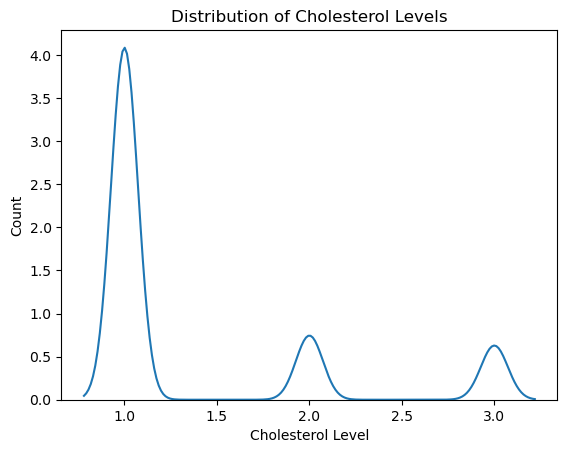

In [96]:
# 19.  What is the distribution of cholesterol levels? 
sns.kdeplot(x='cholesterol', data=hc)
plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.show()

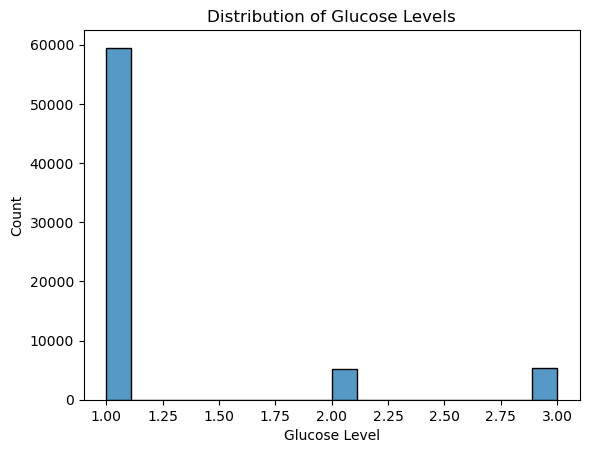

In [98]:
# 20. What percentage of patients have above-normal glucose levels?
sns.histplot(x='gluc', data=hc)
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()


15%  patients have above-normal glucose levels

Insightful Analysis Questions 

In [99]:
# 1. What percentage of the dataset has cardiovascular disease? 

total = hc.shape[0]

num_cardio = hc[hc['cardio'] == 1].shape[0]

# Percentage
percent_cardio = (num_cardio / total) * 100
print(f"Percentage with cardiovascular disease: {percent_cardio:.2f}%")

Percentage with cardiovascular disease: 49.97%


Text(0, 0.5, 'Count')

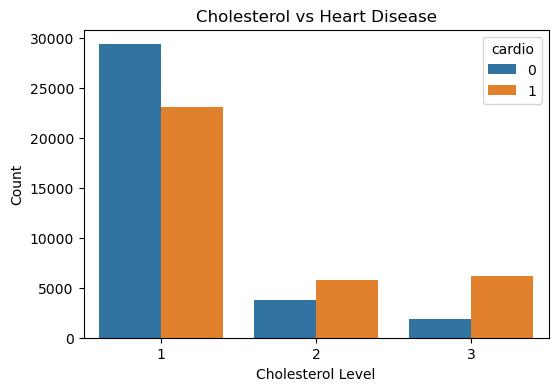

In [101]:
# 2.  Is there a link between cholesterol and heart disease? 
plt.figure(figsize=(6,4))
sns.countplot(x='cholesterol', hue='cardio', data=hc)
plt.title("Cholesterol vs Heart Disease")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")


# yes,cholesterol and heart disease there is a link.

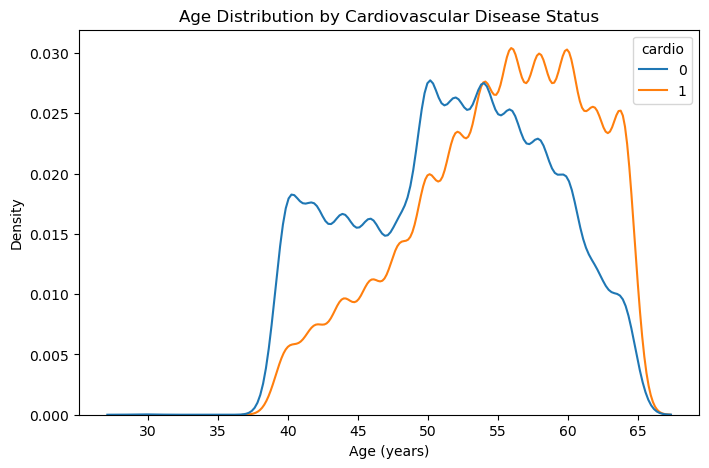

In [103]:
# 3.  Does age impact heart disease prevalence?

hc['age_years']
plt.figure(figsize=(8,5))
sns.kdeplot(data=hc, x='age_years', hue='cardio')
plt.title('Age Distribution by Cardiovascular Disease Status')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

# yes,age impact heart disease prevalence

Text(0.5, 1.0, 'BMI vs Heart Disease')

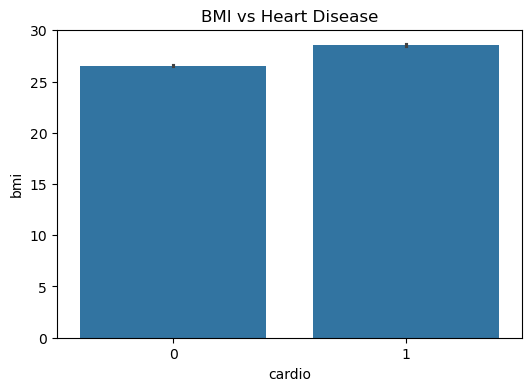

In [116]:
# 4. Is BMI higher in those with heart disease? 
plt.figure(figsize=(6,4))
sns.barplot(x='cardio', y='bmi', data=hc)
plt.title("BMI vs Heart Disease")


# yes,BMI higher in those with heart disease

In [107]:
# 5. Does physical activity reduce heart disease risk?

Text(0.5, 1.0, 'Physical Activity vs Heart Disease')

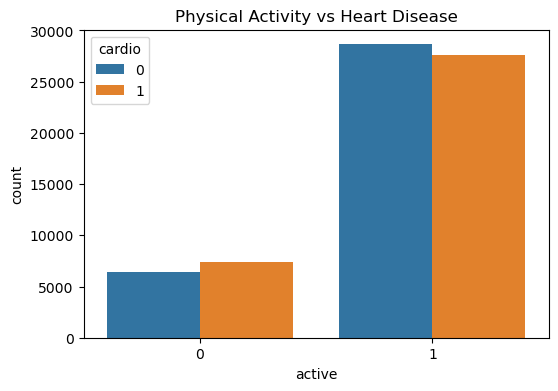

In [109]:
plt.figure(figsize=(6,4))
sns.countplot(x='active', hue='cardio', data=hc)
plt.title("Physical Activity vs Heart Disease")

# we can see physical activity reduce heart disease risk

In [110]:
# 6. Do smokers have more heart disease? 

Text(0.5, 1.0, 'Smoking vs Heart Disease')

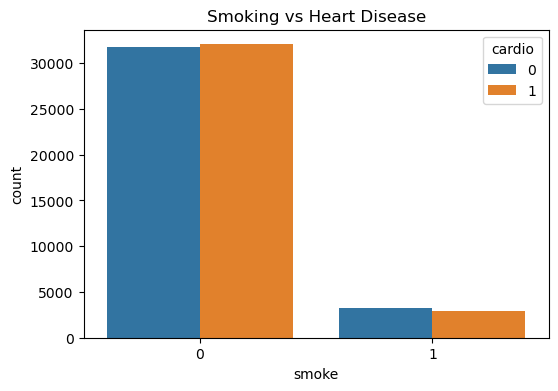

In [112]:
plt.figure(figsize=(6,4))
sns.countplot(x='smoke', hue='cardio', data=hc)
plt.title("Smoking vs Heart Disease")

# it is shown that smokers have more heart disease

In [113]:
# 7.  Is systolic pressure significantly higher in those with heart disease?


Text(0.5, 1.0, 'Systolic Pressure vs Heart Disease')

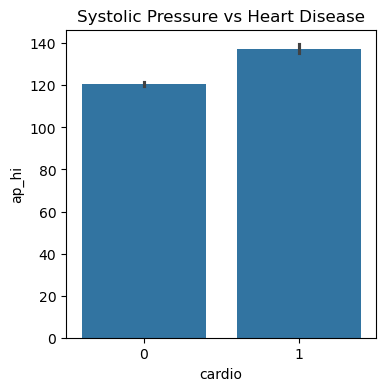

In [115]:
plt.figure(figsize=(4,4))
sns.barplot(x='cardio', y='ap_hi', data=hc)
plt.title("Systolic Pressure vs Heart Disease")


# yes,systolic pressure significantly higher in those with heart disease